# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [78]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

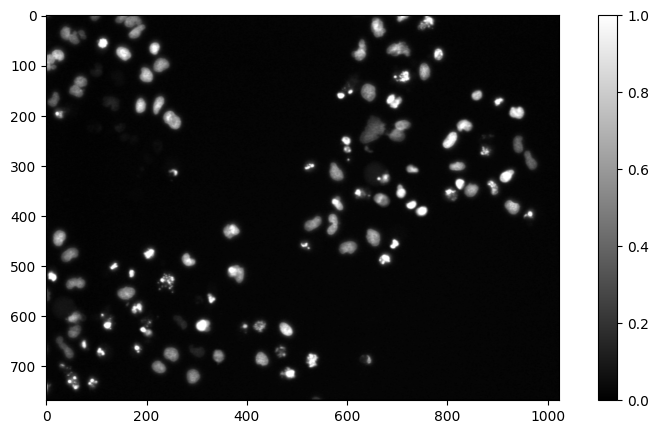

In [79]:
img = plt.imread('data/cells.png')

plt.figure(figsize=(10,5))

plt.imshow(img, 'grey')

plt.colorbar ()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([5.80732e+05, 8.86100e+04, 2.26010e+04, 1.38280e+04, 7.96200e+03,
        7.48100e+03, 4.59700e+03, 3.55300e+03, 4.23200e+03, 2.77600e+03,
        3.00400e+03, 2.57700e+03, 2.43600e+03, 2.90300e+03, 2.41000e+03,
        2.36600e+03, 2.37900e+03, 2.14600e+03, 2.49800e+03, 2.07400e+03,
        2.01700e+03, 2.23400e+03, 1.84300e+03, 1.80200e+03, 1.95600e+03,
        1.29200e+03, 1.38900e+03, 1.03800e+03, 1.01800e+03, 1.02500e+03,
        8.38000e+02, 7.88000e+02, 8.12000e+02, 6.49000e+02, 6.22000e+02,
        4.85000e+02, 4.50000e+02, 5.55000e+02, 6.55000e+02, 3.79900e+03]),
 array([0.        , 0.025     , 0.05      , 0.075     , 0.1       ,
        0.125     , 0.15000001, 0.175     , 0.2       , 0.22499999,
        0.25      , 0.27500001, 0.30000001, 0.32499999, 0.34999999,
        0.375     , 0.40000001, 0.42500001, 0.44999999, 0.47499999,
        0.5       , 0.52499998, 0.55000001, 0.57499999, 0.60000002,
        0.625     , 0.64999998, 0.67500001, 0.69999999, 0.72500002,
      

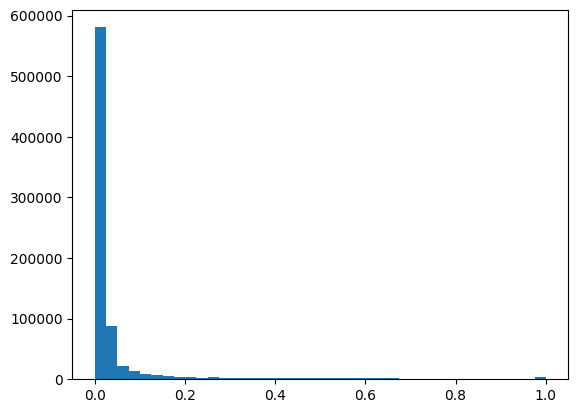

In [80]:
plt.hist(img.flatten(), bins=40)

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [81]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

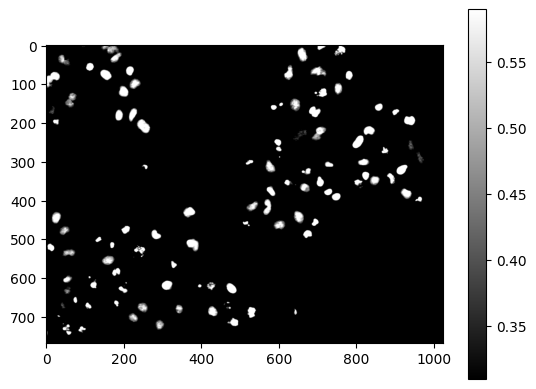

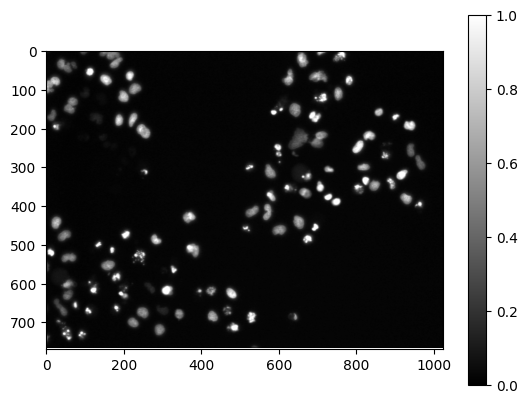

In [82]:
img.clip(T1, T2)
plt.imshow(img.clip(T1, T2), 'grey')
plt.colorbar ()
plt.show()
plt.imshow(img, 'grey')
plt.colorbar ()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

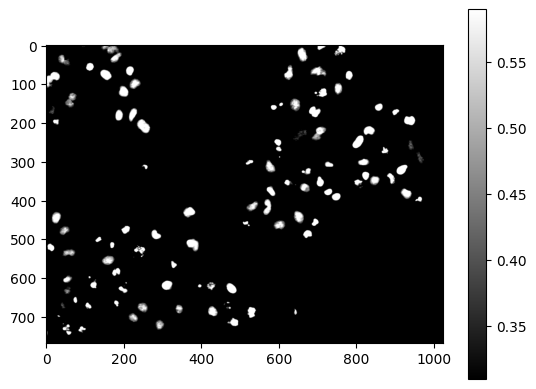

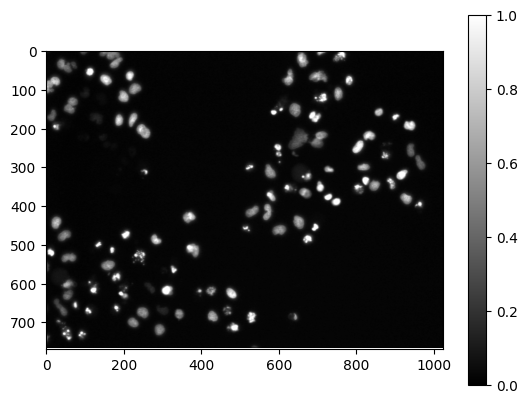

In [83]:
img2 = img.copy()

for r in range( 0, img2.shape [0]):          # geht Zeilen nacheinander durch
    for c in range (0, img2.shape [1]):       # geht Spalten nacheinander durch
        if img2[r,c] < T1:
            img2[r,c] = T1
        elif img2[r,c] > T2:
            img2[r,c] = T2
        else: 
            img2[r,c] = img2[r,c]

plt.imshow(img2, 'grey')
plt.colorbar ()
plt.show()
plt.imshow(img, 'grey')
plt.colorbar ()

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

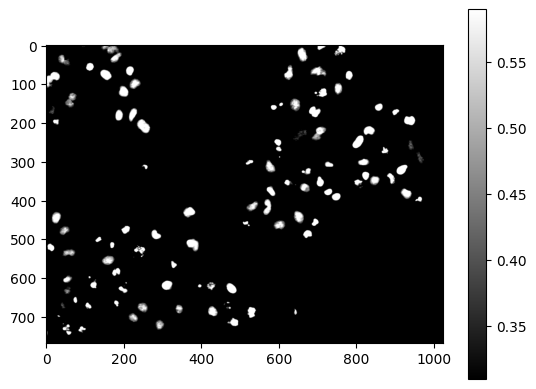

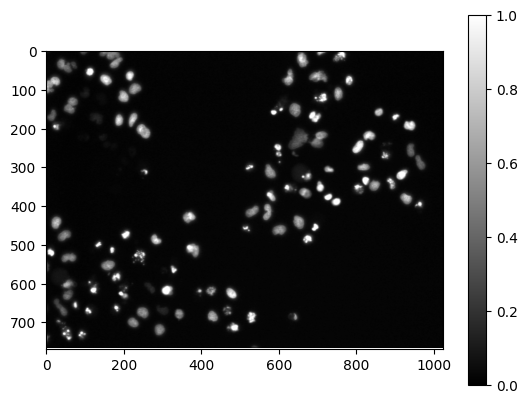

In [85]:
#numpy.ndindex(img.shape) Enthält jedes Pixel in Form von (row, coloumn)
img3 = img.copy()

for p in numpy.ndindex(img3.shape):
    if img3[p] < T1:
        img3[p] = T1
    elif img3[p] > T2:
        img3[p] = T2

plt.imshow(img3, 'grey')
plt.colorbar ()
plt.show()
plt.imshow(img, 'grey')
plt.colorbar ()

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the `...` line with your code:

In [93]:
def clip_image(img_in, T1, T2):
    result = img_in.copy()
    for p in numpy.ndindex(result.shape):
        if result[p] < T1:
            result[p] = T1
        elif result[p] > T2:
            result[p] = T2
    return result

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img_in` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [94]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

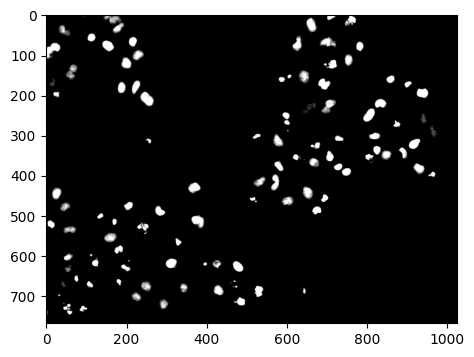

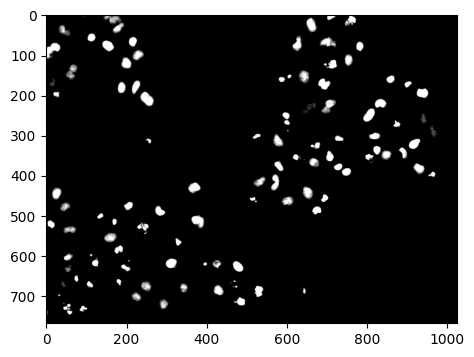

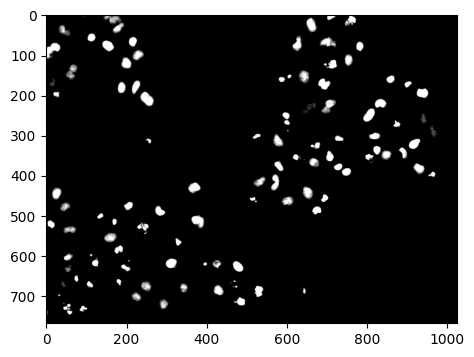

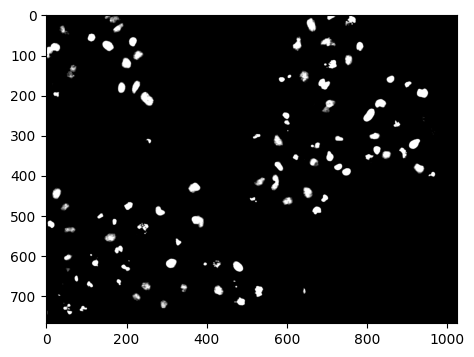

In [106]:
plt.figure(figsize=(7,4))
plt.imshow(clip_image(img, 0.0, 1.0), 'grey')

plt.figure(figsize=(7,4))
plt.imshow(clip_image(img, 0.2, 0.8), 'grey')

plt.figure(figsize=(7,4))
plt.imshow(clip_image(img, 0.3, 0.7), 'grey')

plt.figure(figsize=(7,4))
plt.imshow(clip_image(img, 0.4, 0.6), 'grey')